In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', transpose_data=True)
X, y = mnist["data"], mnist["target"]

/Users/davosli/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/Users/davosli/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
# 最佳维度

import numpy as np
from sklearn.decomposition import PCA


pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

154

In [3]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

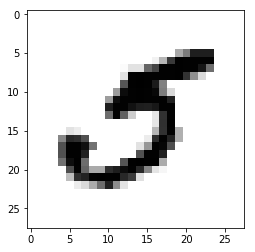

In [4]:
# 压缩前图像
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.show()

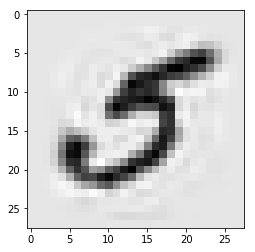

In [6]:
# 压缩到154维后再解压缩回784维
# 数字基本完好无损
X_inverse = pca.inverse_transform(X_reduced)
some_digit = X_inverse[36000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.show()

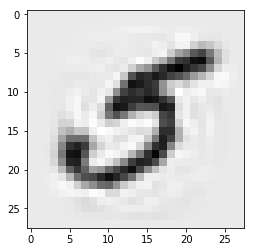

In [9]:
# 增量PCA
# 怎么比非增量的训练还慢？
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X, n_batches):
    inc_pca.partial_fit(X_batch)

X_inc_reduced = inc_pca.transform(X)

X_inc_inverse = inc_pca.inverse_transform(X_inc_reduced)
some_digit = X_inc_inverse[36000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.show()

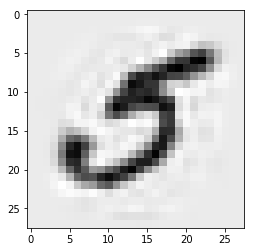

In [12]:
# 随机PCA
rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_rnd_reduced = rnd_pca.fit_transform(X)

X_rnd_inverse = rnd_pca.inverse_transform(X_rnd_reduced)
some_digit = X_rnd_inverse[36000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.show()